In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Scaffolds import MurckoScaffold

import pandas as pd

import base64
import csv
from io import BytesIO

from PIL import Image

from IPython.core.display import SVG, HTML

In [ ]:
def mol2svg(mol):
    """Converting RDKit mol to SVG. Didn't figure how to display it inline in a dataframe, though."""
    d2d = rdMolDraw2D.MolDraw2DSVG(300,300)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    return d2d.GetDrawingText()

In [ ]:
def mol2png(mol):
    """Converting RDKit mol to PNG PIL object"""
    d2d = rdMolDraw2D.MolDraw2DCairo(300,300)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    image = Image.open(BytesIO(d2d.GetDrawingText()))
    return image

In [ ]:
def format_image(img):
    """Format arbitrary PNG image object for inline display"""
    buffer = BytesIO()
    img.save(buffer, 'png')
    return f'<img src="data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}">'

In [ ]:
def mol2display_png(mol):
    """Format RDKit mol for direct inline display. The most convenient, probably."""
    d2d = rdMolDraw2D.MolDraw2DCairo(400,400)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    buffer = BytesIO(d2d.GetDrawingText())
    return f'<img src="data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}">'

In [ ]:
with open('../data/chembl_mtor_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    mtor_ligands = []
    for m in reader:
        mol = Chem.MolFromSmiles(m['Smiles'])
        # get the standardized pChEMBL activity measure for future use
        pchembl = m['pChEMBL Value']
        if not pchembl:
            # some don't have any comparable pChEMBL value, just assign them very low value
            pchembl = -1
        mol.SetDoubleProp('pChEMBL', float(pchembl)) # save the value into mol instance
        mtor_ligands.append(mol)
ligands = pd.DataFrame(mtor_ligands, columns=['mol'])
ligands

In [ ]:
HTML(ligands.head().to_html(formatters={'mol': mol2display_png}, escape=False))

In [ ]:
def mol2scaffold(mol):
    scaffold1 = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
    scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
    return scaffold3

In [ ]:
ligands['scaffold'] = ligands['mol'].apply(mol2scaffold)
ligands['scaffold_smiles'] = ligands['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(ligands.head().to_html(formatters={'mol': mol2display_png, 'scaffold': mol2display_png}, escape=False))

In [ ]:
ligands_scaffolds = ligands.groupby('scaffold_smiles').count()
ligands_scaffolds.sort_values('scaffold', inplace=True, ascending=False)
ligands_scaffolds['scaffold_mol'] = ligands_scaffolds.index.to_series().apply(lambda x: Chem.MolFromSmiles(x))
ligands_scaffolds

In [ ]:
ligands['scaffold'] = ligands['mol'].apply(mol2scaffold)
ligands['scaffold_smiles'] = ligands['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(ligands_scaffolds[['scaffold', 'scaffold_mol']].head().to_html(
    formatters={'scaffold_mol': mol2display_png}, escape=False))

,mol
0,
1,
2,
3,
4,

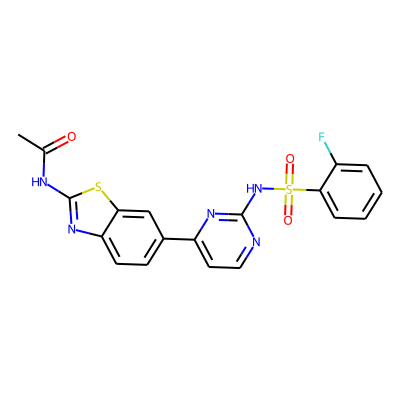
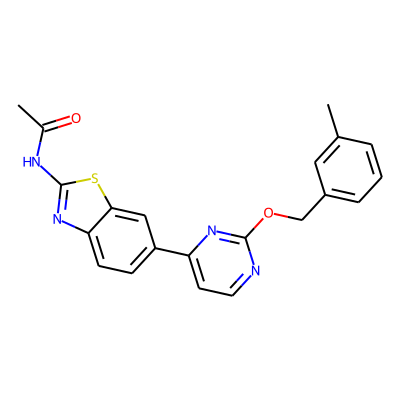
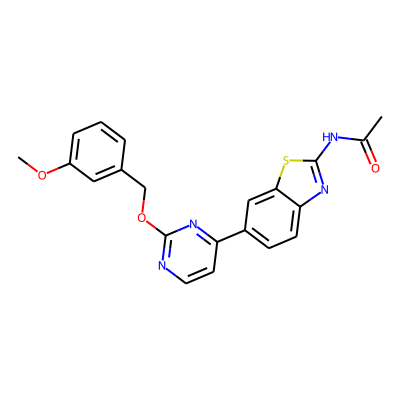
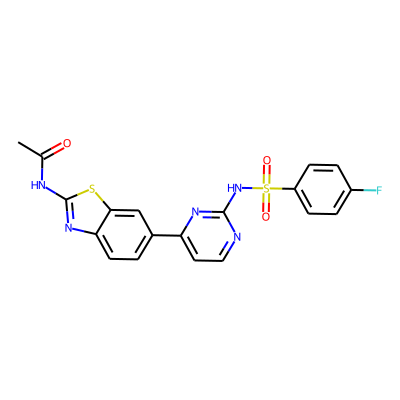
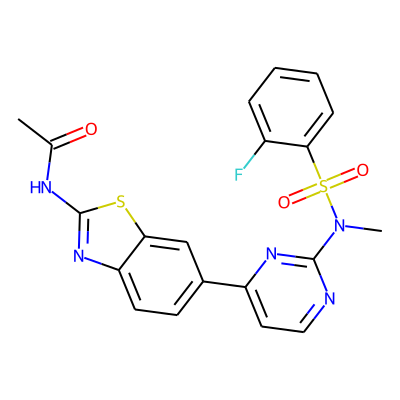

In [12]:
HTML(ligands.head().to_html(formatters={'mol': mol2display_png}, escape=False))

In [16]:
def mol2scaffold(mol):
    scaffold1 = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold2 = MurckoScaffold.MakeScaffoldGeneric(scaffold1)
    scaffold3 = MurckoScaffold.GetScaffoldForMol(scaffold2)
    return scaffold3

,mol,scaffold,scaffold_smiles
0,,,C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1
1,,,C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1
2,,,C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1
3,,,C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1
4,,,C1CCC(CCC2CCCC(C3CCC4CCCC4C3)C2)CC1

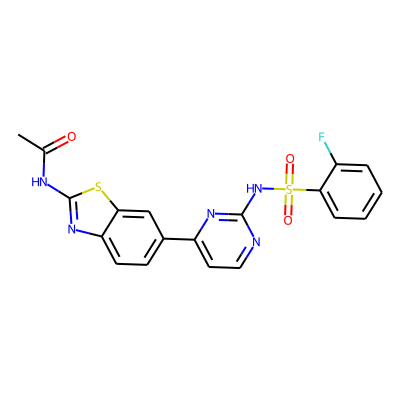
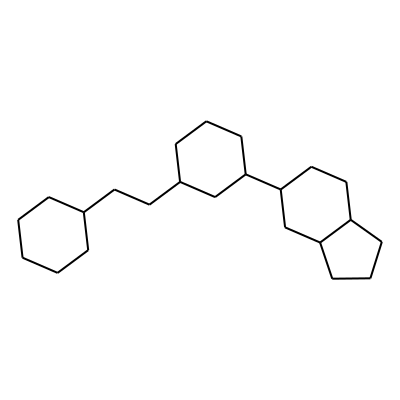
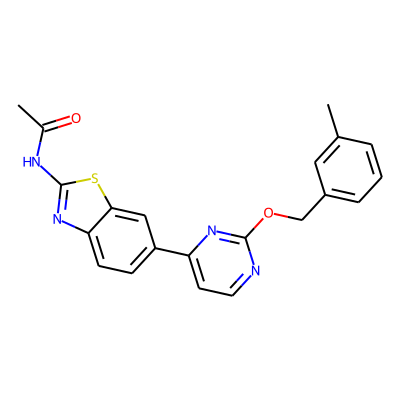
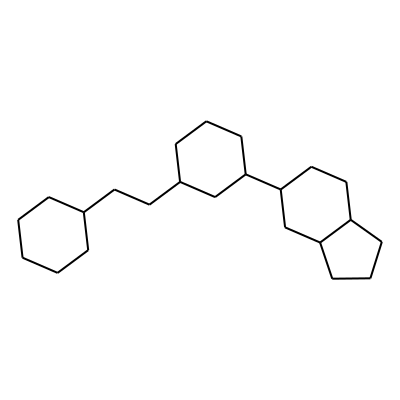
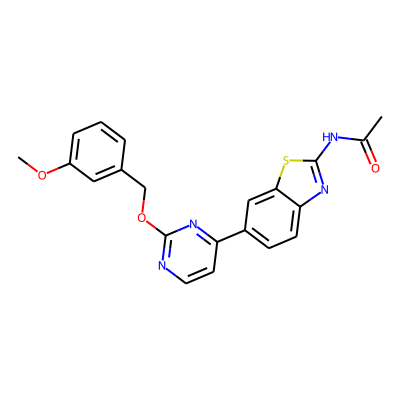
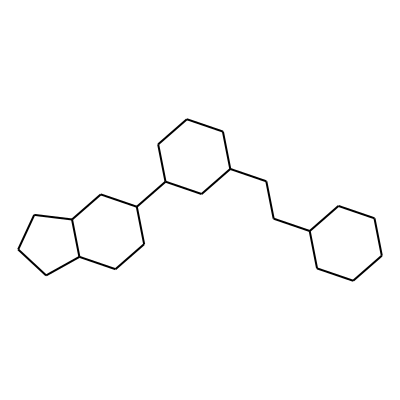
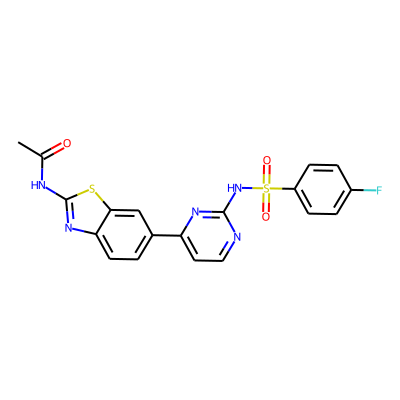
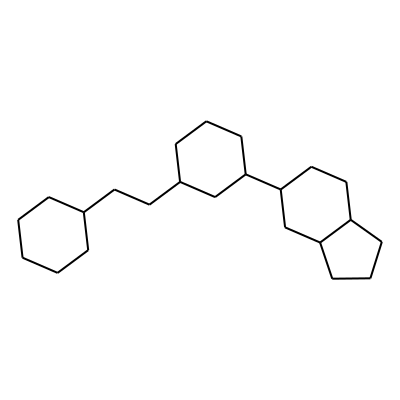
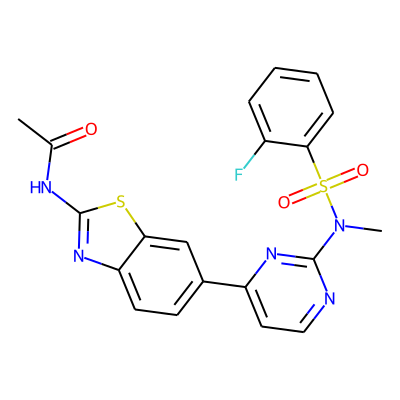
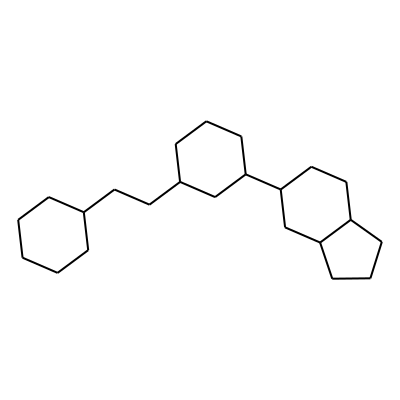

In [19]:
ligands['scaffold'] = ligands['mol'].apply(mol2scaffold)
ligands['scaffold_smiles'] = ligands['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(ligands.head().to_html(formatters={'mol': mol2display_png, 'scaffold': mol2display_png}, escape=False))

In [32]:
ligands_scaffolds = ligands.groupby('scaffold_smiles').count()
ligands_scaffolds.sort_values('scaffold', inplace=True, ascending=False)
ligands_scaffolds['scaffold_mol'] = ligands_scaffolds.index.to_series().apply(lambda x: Chem.MolFromSmiles(x))
ligands_scaffolds

,mol,scaffold,scaffold_mol
scaffold_smiles,,,
C1CCC(C2CCC3C(C2)CC(C2CCCCC2)CC3C2CCCCC2)CC1,283,283,<rdkit.Chem.rdchem.Mol object at 0x7fc3744713f0>
C1CCC(CCC2CCCCC2C2CCC(CC3CCCCC3)CC2)CC1,263,263,<rdkit.Chem.rdchem.Mol object at 0x7fc374471440>
C1CCC(CCC2CCCCC2C2CCCCC2)CC1,190,190,<rdkit.Chem.rdchem.Mol object at 0x7fc3744715d0>
C1CCC(C2CC3CCCC3C(C3CCCCC3)C2)CC1,135,135,<rdkit.Chem.rdchem.Mol object at 0x7fc374471300>
C1CCC(CC2CCCCC2C2CCCCC2)CC1,133,133,<rdkit.Chem.rdchem.Mol object at 0x7fc374471530>
...,...,...,...
C1CCC(CCC2CCCCC2)CC1,1,1,<rdkit.Chem.rdchem.Mol object at 0x7fc3744811c0>
C1CCC(C2CCC3CC4CCCC(C5CCCCC5)C4C3C2)CC1,1,1,<rdkit.Chem.rdchem.Mol object at 0x7fc374481210>
C1CCC(C2CCC3CCC(C4CCC5CCCCC5C4)C3C2)CC1,1,1,<rdkit.Chem.rdchem.Mol object at 0x7fc374481260>


,scaffold,scaffold_mol
scaffold_smiles,,
C1CCC(C2CCC3C(C2)CC(C2CCCCC2)CC3C2CCCCC2)CC1,283,
C1CCC(CCC2CCCCC2C2CCC(CC3CCCCC3)CC2)CC1,263,
C1CCC(CCC2CCCCC2C2CCCCC2)CC1,190,
C1CCC(C2CC3CCCC3C(C3CCCCC3)C2)CC1,135,
C1CCC(CC2CCCCC2C2CCCCC2)CC1,133,

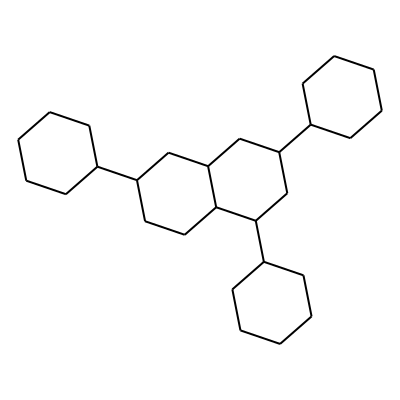
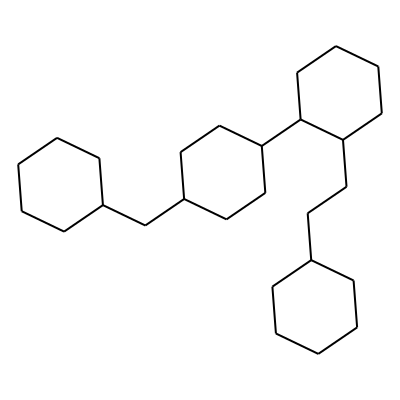
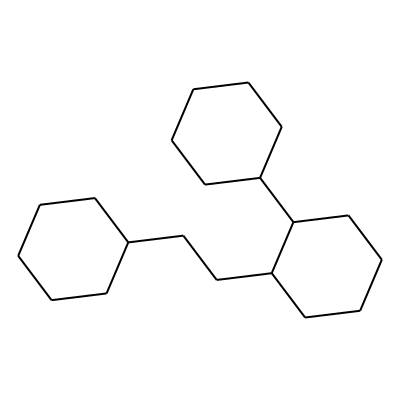
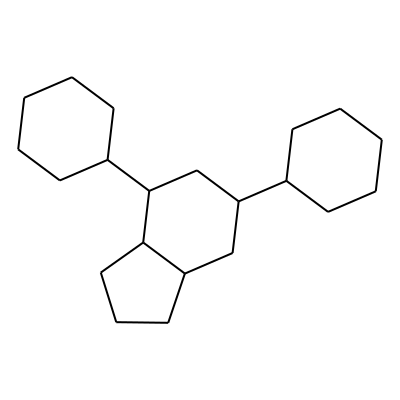
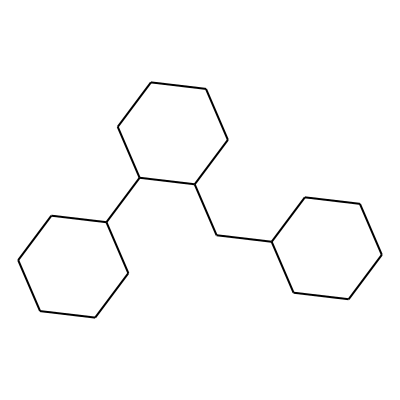

In [33]:
ligands['scaffold'] = ligands['mol'].apply(mol2scaffold)
ligands['scaffold_smiles'] = ligands['scaffold'].apply(lambda x: Chem.MolToSmiles(x))
HTML(ligands_scaffolds[['scaffold', 'scaffold_mol']].head().to_html(
    formatters={'scaffold_mol': mol2display_png}, escape=False))